In [1]:
from io import StringIO
from datetime import datetime, date
import pandas as pd
import missingno as msno
import json, os, requests, joblib, warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data extract/load

### requests method

In [ ]:
api_url = "https://sdacelo-real-time-fraud-detection.hf.space/current-transactions"
r = requests.get(api_url)
api_data = r.json()
df_api = pd.read_json(api_data, orient='split')

In [9]:
df_api.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,current_time
441142,630451534402,"fraud_Walter, Hettinger and Kessler",personal_care,42.95,Rachel,Daniels,F,561 Little Plain Apt. 738,Wetmore,MI,...,46.3535,-86.6345,765,Immunologist,1972-06-12,f0fbe0c2a70c93f634a4e047acb4e914,46.45557,-86.208001,0,2026-01-26 11:00:28.407


### bash method

bash operator simulation >> 5*api pull for batch >> interpret html reply

In [ ]:
with open("test_api.json", "r", encoding="utf-8") as api_source:
    src_file = api_source.read()
usable_file = json.loads(src_file)
df_temp0 = pd.read_json(StringIO(usable_file), orient="split")
df_temp0.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,current_time
297841,4736845434667908128,fraud_Wilkinson Ltd,entertainment,33.57,Toni,Gomez,F,062 Carl Dam,Altona,NY,...,44.8816,-73.6408,2148,"Surveyor, land/geomatics",1953-05-23,f61ec75dd067a42ab752abdbe5359efd,45.257478,-73.567097,0,2026-01-26 10:01:17.998


In [5]:
df_temp = pd.DataFrame()
path = r'data\json'
for file in os.listdir(path):
        if file.endswith('.json'):
            with open(f'{path}/{file}', "r", encoding='utf-8') as source_json:
                source_file = source_json.read()
                usable_source = json.loads(source_file)
                iobject = StringIO(usable_source)
                json_temp = pd.read_json(iobject, orient='split')
                df_temp = pd.concat([df_temp, json_temp])
        else:
            print(f'Error: {file} is not a json!')
df_temp.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,current_time
223945,6011388901471808,fraud_Shields-Wunsch,health_fitness,87.98,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,PA,...,40.1151,-79.8627,427,Mining engineer,1951-02-05,c203df31d90122fe55c0c9445fc3be1c,40.631435,-80.816997,0,2026-01-29 09:33:40.268
553388,213157767990030,"fraud_Lehner, Mosciski and King",misc_net,28.13,Tara,Campbell,F,05050 Rogers Well Apt. 439,Rock Springs,WY,...,41.6060,-109.2300,27971,Music therapist,1984-08-01,544ac0ca1bd90037e61994442ad3e1c3,41.988448,-109.381488,0,2026-01-29 09:33:45.913
170227,4836998673805450,"fraud_Torp, Muller and Borer",health_fitness,69.84,Susan,Hardy,F,516 Brown Parks,Manistique,MI,...,46.0062,-86.2555,6469,Trade mark attorney,1979-04-12,f45b109134581d91560209e0f3f4f0ed,45.421699,-86.182432,0,2026-01-29 09:33:51.560
261989,3586955669388457,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,87.23,Benjamin,Rogers,M,24191 Elizabeth Mill,Bolivar,PA,...,40.3673,-79.1605,1770,"Administrator, local government",1994-12-08,8dc7c2a481dbeeb547c9447f004ad267,39.966484,-79.648675,0,2026-01-29 09:33:57.110
262515,676195318214,fraud_Emard Inc,gas_transport,96.62,Brandy,Quinn,F,9734 Beard Fields Suite 885,Altair,TX,...,29.6047,-96.5249,106,"Editor, film/video",1983-07-24,5aa2733c1ac31f3a384dd97dcc2eac33,29.972924,-96.599838,0,2026-01-29 09:34:06.746


In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 223945 to 262515
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cc_num        5 non-null      int64         
 1   merchant      5 non-null      object        
 2   category      5 non-null      object        
 3   amt           5 non-null      float64       
 4   first         5 non-null      object        
 5   last          5 non-null      object        
 6   gender        5 non-null      object        
 7   street        5 non-null      object        
 8   city          5 non-null      object        
 9   state         5 non-null      object        
 10  zip           5 non-null      int64         
 11  lat           5 non-null      float64       
 12  long          5 non-null      float64       
 13  city_pop      5 non-null      int64         
 14  job           5 non-null      object        
 15  dob           5 non-null      object   

# ML

### EDA

In [2]:
df_start = pd.read_csv("https://lead-program-assets.s3.eu-west-3.amazonaws.com/M05-Projects/fraudTest.csv")
df_start.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df_start.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


The one column that especially attracts attention above is the very last - what will be our target: 'is_fraud'.

Since frauds are labeled as 1 and the rest as 0, computing the mean works to get an idea of its distribution...

...and reading that it only contains 0.38% means that distribution is disastrous for our machine learning. Can't do anything about it though!

In [4]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Now for a quick view of our missing values:

<Axes: >

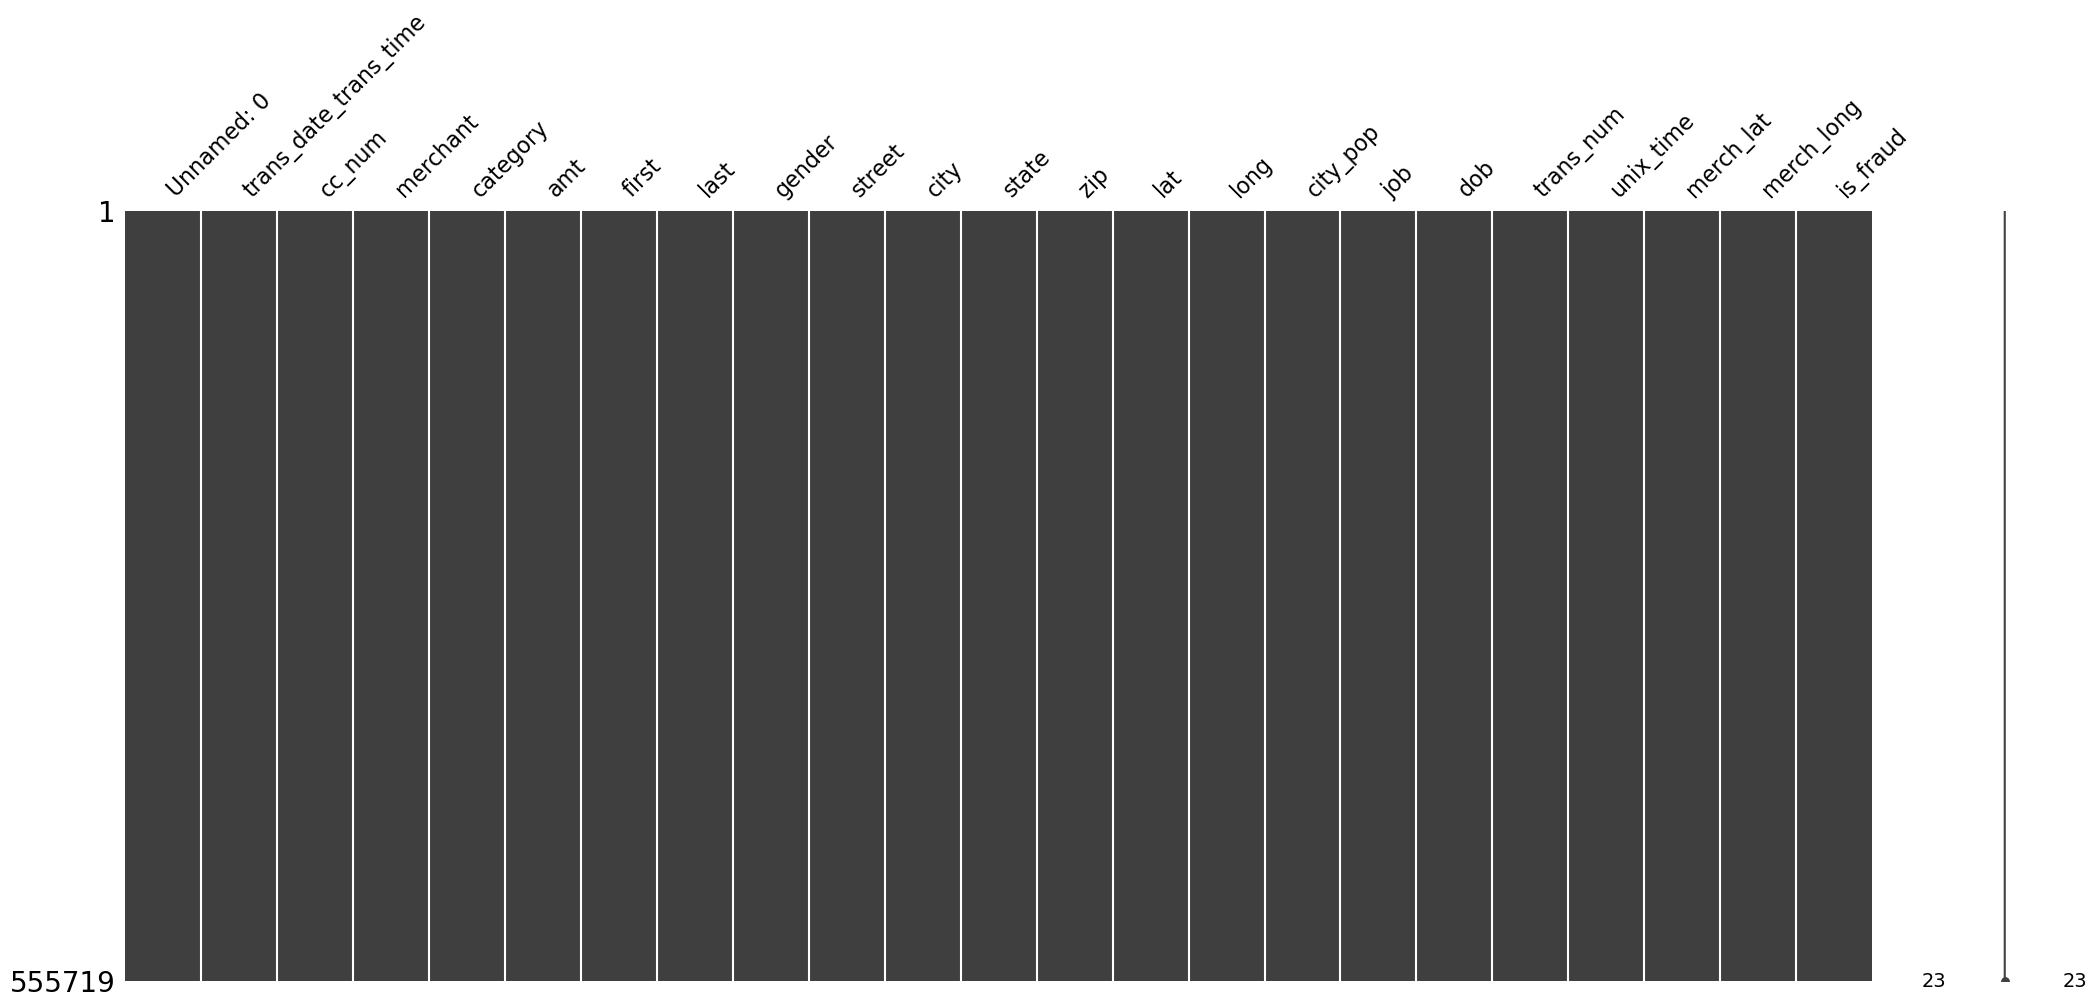

In [3]:
msno.matrix(df_start)

Absolutely no missing data, more than a rarity - an exception; let's keep going!

'Unnamed: 0' merely is a duplicate of the index; 'unix_time' is not described and once translated into a timestamp, it doesn't match the information contained in 'trans_date_trans_time'. We'll drop these two.

Let's then match our dataframe's columns to the API's, to anticipate future work with reusable custom functions:

In [3]:
df_start = df_start.drop(['Unnamed: 0', 'unix_time'], axis=1)
df_start = df_start.rename(columns={'trans_date_trans_time':'current_time'})
df_start.insert((len(df_start.columns))-1, 'current_time', df_start.pop('current_time'))
df_start.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,current_time
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,2020-06-21 12:14:25
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,2020-06-21 12:14:33
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,2020-06-21 12:14:53
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,2020-06-21 12:15:15
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,2020-06-21 12:15:17


In [4]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cc_num        555719 non-null  int64  
 1   merchant      555719 non-null  object 
 2   category      555719 non-null  object 
 3   amt           555719 non-null  float64
 4   first         555719 non-null  object 
 5   last          555719 non-null  object 
 6   gender        555719 non-null  object 
 7   street        555719 non-null  object 
 8   city          555719 non-null  object 
 9   state         555719 non-null  object 
 10  zip           555719 non-null  int64  
 11  lat           555719 non-null  float64
 12  long          555719 non-null  float64
 13  city_pop      555719 non-null  int64  
 14  job           555719 non-null  object 
 15  dob           555719 non-null  object 
 16  trans_num     555719 non-null  object 
 17  merch_lat     555719 non-null  float64
 18  merc

### Cleaning & feature engineering

In [5]:
df_test = df_start.copy(deep=True)

In [6]:
def age(born):
    born  = datetime.strptime(born, '%Y-%m-%d').date()
    today  = date.today()
    return today.year  - born.year  - ((today.month,today.day) < (born.month,born.day))

In [7]:
def make_date_feature(df, col):
    df[col] = pd.to_datetime(df[col])
    df['time'] = pd.to_datetime(df[col]).dt.time
    df['hour'] = pd.to_datetime(df[col]).dt.hour
    df['is_night'] = df['hour'].between(22, 6, inclusive="left").astype(int)
    df['is_morning'] = df['hour'].between(6, 12, inclusive="left").astype(int)
    df['is_afternoon'] = df['hour'].between(12, 18, inclusive="left").astype(int)
    df['is_evening'] = df['hour'].between(18, 22, inclusive="left").astype(int)
    df['is_business_hour'] = df['hour'].between(8, 17).astype(int)
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['dayofweek'] = df[col].dt.day_of_week
    df['is_we'] = df['dayofweek'].between(5, 6).astype(int)

In [8]:
df_test['age'] = df_test.apply(lambda row:age(row['dob']),axis=1)
make_date_feature(df_test, col='current_time')

In [9]:
df_test.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,is_night,is_morning,is_afternoon,is_evening,is_business_hour,year,month,day,dayofweek,is_we
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,0,0,1,0,1,2020,6,21,6,1
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,0,0,1,0,1,2020,6,21,6,1
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,0,0,1,0,1,2020,6,21,6,1
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,0,0,1,0,1,2020,6,21,6,1
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,0,0,1,0,1,2020,6,21,6,1


Dropping several columns:

* 'trans_num' matching unique ids for a given transaction,
* 'dob' since we translated it into 'age',
* 'first' & 'last' to avoid creating bias (e.g. from one regular frauder's name),
* 'current_time' & 'time' since we extracted all date/time elements we considered relevant,
* 'street', 'city', 'state' & 'zip' since we're using instead their gps coordinates.

Our target, 'is_fraud', will be isolated later in the ML part.

In [10]:
df_test = df_test.drop(['dob', 'trans_num', 'first', 'last', 'time', 'current_time', 'street', 'city', 'state', 'zip'], axis=1)
df_test.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,is_night,is_morning,is_afternoon,is_evening,is_business_hour,year,month,day,dayofweek,is_we
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,...,0,0,1,0,1,2020,6,21,6,1
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,...,0,0,1,0,1,2020,6,21,6,1
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",40.495810,...,0,0,1,0,1,2020,6,21,6,1
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,28.812398,...,0,0,1,0,1,2020,6,21,6,1
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,44.959148,...,0,0,1,0,1,2020,6,21,6,1


### Pre-processing

In [11]:
df_pre = df_test.copy(deep=True)

In [12]:
y = df_pre['is_fraud']
X = df_pre.drop('is_fraud', axis=1)

In [13]:
X.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'age', 'hour', 'is_night',
       'is_morning', 'is_afternoon', 'is_evening', 'is_business_hour', 'year',
       'month', 'day', 'dayofweek', 'is_we'],
      dtype='object')

In [14]:
numerical_features = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'hour',
                       'year', 'month', 'day', 'dayofweek']
categorical_features = ['merchant', 'category', 'gender', 'job', 'is_night', 'is_morning', 'is_afternoon', 'is_evening',
                        'is_business_hour', 'is_we']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
print('===X_train preview===')
print(X_train[0:5]) 
print()

X_test = preprocessor.transform(X_test)
print('===X_test preview===')
print(X_test[0:5,:])

print("\n===Pre-processing done!===")

===X_train preview===
  (0, 0)	-0.3149978914160506
  (0, 1)	-0.3318637120123301
  (0, 2)	1.1960745835775957
  (0, 3)	0.4331810351086403
  (0, 4)	-0.2904120011023858
  (0, 5)	1.0168296510875083
  (0, 6)	0.37794405649155305
  (0, 7)	1.7948790454789494
  (0, 8)	-0.11918046071200819
  (0, 10)	-0.25770699422071425
  (0, 11)	-1.0581554971706255
  (0, 12)	-1.252756515261549
  (0, 656)	1.0
  (0, 718)	1.0
  (0, 919)	1.0
  (0, 1197)	1.0
  (0, 1199)	1.0
  (1, 0)	-0.3192987788106753
  (1, 1)	0.7993040015588484
  (1, 2)	-0.46279501485169144
  (1, 3)	0.6637166668022795
  (1, 4)	-0.22282878006549645
  (1, 5)	-0.33224391705235407
  (1, 6)	0.730530291645635
  (1, 7)	-0.6148712724217695
  :	:
  (3, 10)	-0.25770699422071425
  (3, 11)	1.3985982445108327
  (3, 12)	-0.7936338753862556
  (3, 487)	1.0
  (3, 712)	1.0
  (3, 718)	1.0
  (3, 976)	1.0
  (4, 0)	-0.31941906452370367
  (4, 1)	-0.3854754019027245
  (4, 2)	0.6971140086356753
  (4, 3)	1.1500379380723265
  (4, 4)	-0.2919690491647552
  (4, 5)	0.73889298221

### Random Forest Classifier

In [90]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',  # Heavily imbalanced data
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_jobs=-1, random_state=42)

In [92]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['0 = legit', '1 = fraud']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   0 = legit       1.00      0.95      0.97    110715
   1 = fraud       0.06      0.82      0.11       429

    accuracy                           0.95    111144
   macro avg       0.53      0.88      0.54    111144
weighted avg       1.00      0.95      0.97    111144


Confusion Matrix:
[[104942   5773]
 [    77    352]]


In [96]:
importance_rfc_df = pd.DataFrame({
    'features' : preprocessor.get_feature_names_out(),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

importance_rfc_df

,features,importance
1,num__amt,0.308961
8,num__hour,0.132236
1199,cat__is_business_hour_1,0.087185
1197,cat__is_afternoon_1,0.055509
1196,cat__is_morning_1,0.049588
1198,cat__is_evening_1,0.038344
715,cat__category_shopping_net,0.031633
10,num__month,0.027516
708,cat__category_grocery_pos,0.026907
712,cat__category_misc_net,0.014744


### Logistic Regression

In [93]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_lr_pred = classifier.predict(X_test)
y_lr_proba = classifier.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_lr_pred, target_names=['0 = legit', '1 = fraud']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_lr_pred))


Classification Report:
              precision    recall  f1-score   support

   0 = legit       1.00      1.00      1.00    110715
   1 = fraud       0.77      0.15      0.26       429

    accuracy                           1.00    111144
   macro avg       0.88      0.58      0.63    111144
weighted avg       1.00      1.00      1.00    111144


Confusion Matrix:
[[110695     20]
 [   363     66]]


### Exporting pre-processor & best model

To preserve transactions' integrity, we'll recover the model with the best recall score, meaning the Random Forest Classifier:

In [17]:
models_path = './data/model/'

In [20]:
joblib.dump(preprocessor, f'{models_path}preprocessor')

['./data/model/preprocessor']

In [ ]:
joblib.dump(model, f'{models_path}detect_model', compress=True)

['./data/model/detect_model']

### Testing local model

In [18]:
loaded_model = joblib.load(f'{models_path}detect_model')
test_pred = loaded_model.predict(X_test[:5])
print(test_pred)

[0 0 0 0 0]
